다음 데이터 세트를 이용하여 다이아몬드 가격예측(회귀) 

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv" diamonds = pd.read_csv(url) 

1. ML (RF, DT, LR) 수행

2. Dense layer만 이용 FNCC 구현

3. 순환 데이터 변환후 CNN 구현



각 단계별로 수행완료후

검사받은 이후에 다음 단계 진행

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"
df = pd.read_csv(url)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
# 결측치 확인
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [4]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['cut'] = label_encoder.fit_transform(df['cut'])
label_encoder = LabelEncoder()
df['color'] = label_encoder.fit_transform(df['color'])
label_encoder = LabelEncoder()
df['clarity'] = label_encoder.fit_transform(df['clarity'])
label_encoder = LabelEncoder()

In [6]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
X=df.drop('carat',axis=1)
X.head()

,cut,color,clarity,depth,table,price,x,y,z
0,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [8]:
y=df['carat']
y.value_counts()

carat
0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: count, Length: 273, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [11]:
Y = pd.get_dummies(y).values

In [12]:
X = X.values

In [13]:
X

array([[2.  , 1.  , 3.  , ..., 3.95, 3.98, 2.43],
       [3.  , 1.  , 2.  , ..., 3.89, 3.84, 2.31],
       [1.  , 1.  , 4.  , ..., 4.05, 4.07, 2.31],
       ...,
       [4.  , 0.  , 2.  , ..., 5.66, 5.68, 3.56],
       [3.  , 4.  , 3.  , ..., 6.15, 6.12, 3.74],
       [2.  , 0.  , 3.  , ..., 5.83, 5.87, 3.64]])

In [14]:
y

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

In [15]:
Y

array([[False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [17]:
X_train.shape[1]

9

In [18]:
#Defining the model 

from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam


input_layer = Input(shape=(7,))

hidden1 = Dense(7, activation='tanh')(input_layer)
hidden2 = Dense(64, activation='tanh')(hidden1)
hidden3 = Dense(32, activation='tanh')(hidden2)

output_layer = Dense(1)(hidden3)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,681 (10.47 KB)

 Trainable params: 2,681 (10.47 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 2/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 3/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 4/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 5/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 6/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 7/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 8/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 9/30
1349/1349 ━━━

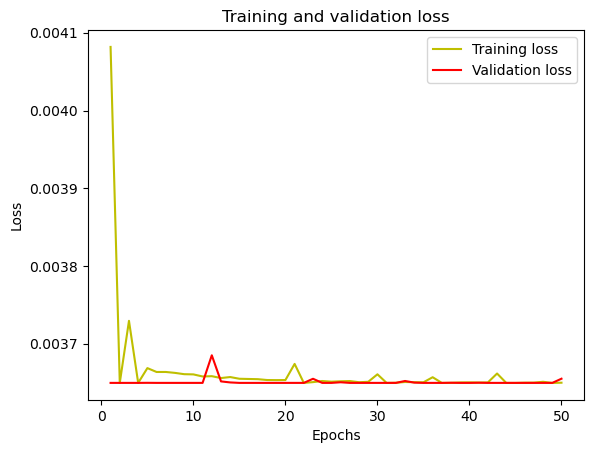

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()